In [50]:
import h5py
import numpy as np

In [51]:


f = h5py.File('../data/tmm_dataset_sharing/fashon_parsing_data.mat', 'r')
print(list(f.keys()))
category_name = f.get('all_category_name').value
colors_name = f.get('all_colors_name').value
fashion_dataset = f.get('fashion_dataset').value


['#refs#', 'all_category_name', 'all_colors_name', 'fashion_dataset']


In [56]:
f[category_name[0][1]].value

array([[ 84],
       [ 45],
       [115],
       [104],
       [105],
       [114],
       [116]], dtype=uint16)

In [57]:
f[colors_name[0][1]].value

array([[ 98],
       [101],
       [105],
       [103],
       [101]], dtype=uint16)

In [48]:
f[fashion_dataset[0][0]]

<HDF5 group "/#refs#/L" (4 members)>

In [64]:
f.get('#refs#').get('0').get('segmentation').value

array([[  0.,   0.,   0., ...,  24.,  24.,  24.],
       [  0.,   0.,   0., ...,  24.,  24.,  24.],
       [  0.,   0.,   0., ...,  24.,  24.,  24.],
       ...,
       [400., 400., 400., ..., 424., 424., 424.],
       [400., 400., 400., ..., 424., 424., 424.],
       [400., 400., 400., ..., 424., 424., 424.]], dtype=float32)

In [125]:
all_category_name = f.get('fas').value[0]
print(all_category_name[0])
print(f[all_category_name[0]].value)


<HDF5 object reference>
[[ 98]
 [107]]


In [113]:
seg_data = f.get('#refs#').get('zf').get('segmentation').value
color_label = f.get('#refs#').get('zf').get('color_label').value[0]
category_label = f.get('#refs#').get('zf').get('category_label').value[0]
shape = np.shape(seg_data)

In [114]:
key_ref = list(f.get('#refs#').keys())

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
pixels = seg_data.flatten()

pix_colors = []
pix_labels = []
for pix in pixels:
    pix = int(pix)
    color = color_label[pix]
    label = category_label[pix]
    pix_colors.append(color)
    pix_labels.append(label)

In [118]:
new_color_image = np.reshape(pix_colors, shape)
new_label_image = np.reshape(pix_labels, shape)

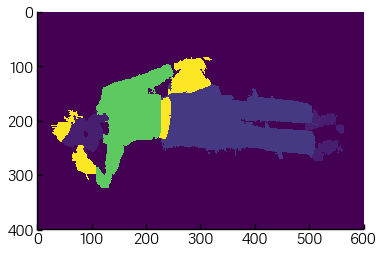

In [119]:
plt.imshow(new_color_image)

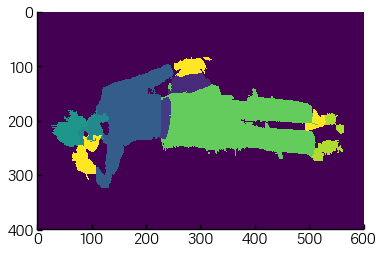

In [120]:
plt.imshow(new_label_image)

In [ ]:
# since we have sub pixel labeling, we won't need a bounding box, because we can just apply a mask to the image before we
# input it into the neural network